In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Start with Christopher Dataset on the BRFSS Module

In [2]:
# Assuming 'data.XPT' is your SAS Transport file
LLCP2022 = pd.read_sas(r"C:\Users\Chris\OneDrive\Documents\Projects\iubdc\iubdc_data\brfss\LLCP2022XPT\LLCP2022.XPT")

# Assuming 'data.XPT' is your SAS Transport file
LLCP22V1 = pd.read_sas(r"C:\Users\Chris\OneDrive\Documents\Projects\iubdc\iubdc_data\brfss\LLCP22V1_XPT\LLCP22V1.XPT")

# Assuming 'data.XPT' is your SAS Transport file
LLCP22V2 = pd.read_sas(r"C:\Users\Chris\OneDrive\Documents\Projects\iubdc\iubdc_data\brfss\LLCP22V2_XPT\LLCP22V2.XPT")


In [4]:
# Declare dictionaries for states with ace data
ace_states_LLCP2022 = { 
    'Arkansas': 5,
    'Florida': 12,
    'Iowa': 19,
    'Nevada': 32,
    'North Dakota': 38,
    'Oregon': 41,
    'South Dakota': 46,
    'Virginia': 51
}

ace_states_LLCP22V1 = {
    'Arizona': 4,
    'Ohio': 39
}

ace_states_LLCP22V2 = {
    'New Jersey': 34,
    'Oklahoma': 40
}



In [5]:
# Filter the LLCP2022 DataFrame to only include the states in the ace_states_LLCP2022 dictionary
LLCP2022_ace = LLCP2022[LLCP2022['_STATE'].isin(ace_states_LLCP2022.values())]

# Filter the LLCP2022V1 DataFrame to only include the states in the ace_states_LLCP2022V1 dictionary
LLCP22V1_ace = LLCP22V1[LLCP22V1['_STATE'].isin(ace_states_LLCP22V1.values())]

# Filter the LLCP2022V2 DataFrame to only include the states in the ace_states_LLCP2022V2 dictionary
LLCP22V2_ace = LLCP22V1[LLCP22V1['_STATE'].isin(ace_states_LLCP22V2.values())]

In [ ]:
# Rename weight variables _LLCPWT, _LCPWTV1, _LCPWTV2 to FINALWT for df ace
LLCP2022_ace.rename(columns={'_LLCPWT': 'FINALWT'}, inplace=True)
LLCP22V1_ace.rename(columns={'_LLCPWTV1': 'FINALWT'}, inplace=True)
LLCP22V2_ace.rename(columns={'_LLCPWTV2': 'FINALWT'}, inplace=True)

In [6]:
# Bind the rows of the three dataframes
ace_data = pd.concat([LLCP2022_ace, LLCP22V1_ace, LLCP22V2_ace])
print(ace_data.shape)

(76898, 330)


In [7]:
ace_data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_CLCWTV1,_LCPWTV1
20556,5.0,1.0,b'01272022',b'01',b'27',b'2022',1100.0,b'2022000009',2.022000e+09,1.0,...,1.0,5.000000e+01,2.0,3.500000e+02,1.0,NaN,NaN,9.0,NaN,NaN
20557,5.0,1.0,b'01312022',b'01',b'31',b'2022',1100.0,b'2022000010',2.022000e+09,1.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0,NaN,NaN
20558,5.0,1.0,b'01232022',b'01',b'23',b'2022',1100.0,b'2022000011',2.022000e+09,1.0,...,1.0,1.000000e+02,1.0,7.000000e+02,1.0,1.0,1.0,2.0,NaN,NaN
20559,5.0,1.0,b'01262022',b'01',b'26',b'2022',1100.0,b'2022000012',2.022000e+09,1.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,1.0,NaN,NaN
20560,5.0,1.0,b'01272022',b'01',b'27',b'2022',1100.0,b'2022000013',2.022000e+09,1.0,...,1.0,7.000000e+00,1.0,4.700000e+01,1.0,1.0,2.0,2.0,NaN,NaN


Missing M15.12 and .13

In [15]:
# Keep Columns of Interest
columns_to_keep = ['GENHLTH', 'MENTHLTH', 'POORHLTH', 'ADDEPEV3', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'DECIDE', 'DIFFALON', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']
ace_data = ace_data[columns_to_keep]

<Axes: >

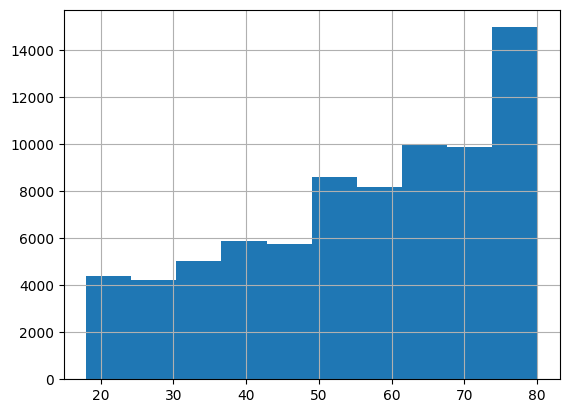

In [14]:
ages = ['_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G']
age_data = ace_data[ages]
age_data.head()

# Create a histogram of the _AGE80 column
age_data['_AGE80'].hist()

In [11]:
for column in ace_data.columns:
    print(column)

_STATE
FMONTH
IDATE
IMONTH
IDAY
IYEAR
DISPCODE
SEQNO
_PSU
CTELENM1
PVTRESD1
COLGHOUS
STATERE1
CELPHON1
LADULT1
COLGSEX1
NUMADULT
LANDSEX1
NUMMEN
NUMWOMEN
RESPSLCT
SAFETIME
CTELNUM1
CELLFON5
CADULT1
CELLSEX1
PVTRESD3
CCLGHOUS
CSTATE1
LANDLINE
HHADULT
SEXVAR
GENHLTH
PHYSHLTH
MENTHLTH
POORHLTH
PRIMINSR
PERSDOC3
MEDCOST1
CHECKUP1
EXERANY2
SLEPTIM1
LASTDEN4
RMVTETH4
CVDINFR4
CVDCRHD4
CVDSTRK3
ASTHMA3
ASTHNOW
CHCSCNC1
CHCOCNC1
CHCCOPD3
ADDEPEV3
CHCKDNY2
HAVARTH4
DIABETE4
DIABAGE4
MARITAL
EDUCA
RENTHOM1
NUMHHOL4
NUMPHON4
CPDEMO1C
VETERAN3
EMPLOY1
CHILDREN
INCOME3
PREGNANT
WEIGHT2
HEIGHT3
DEAF
BLIND
DECIDE
DIFFWALK
DIFFDRES
DIFFALON
HADMAM
HOWLONG
CERVSCRN
CRVCLCNC
CRVCLPAP
CRVCLHPV
HADHYST2
HADSIGM4
COLNSIGM
COLNTES1
SIGMTES1
LASTSIG4
COLNCNCR
VIRCOLO1
VCLNTES2
SMALSTOL
STOLTEST
STOOLDN2
BLDSTFIT
SDNATES1
SMOKE100
SMOKDAY2
USENOW3
ECIGNOW2
LCSFIRST
LCSLAST
LCSNUMCG
LCSCTSC1
LCSSCNCR
LCSCTWHN
ALCDAY4
AVEDRNK3
DRNK3GE5
MAXDRNKS
FLUSHOT7
FLSHTMY3
PNEUVAC4
TETANUS1
HIVTST7
HIVTSTD3
HIVRISK5
COVID